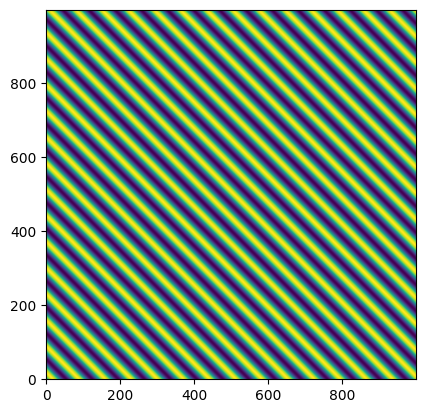

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

theta = np.pi / 4 # angle of rotation in radians
freq = 0.02

x = np.linspace(0, 1000, num=1000).reshape((1,1000))
y = np.linspace(0, 1000, num=1000).reshape((1000,1))

x_val = x * np.cos(theta)   # rotate x-coordinates by angle theta
y_val = y * np.sin(theta)   # rotate y-coordinates by angle theta
xy = x_val + y_val          # create a 2D array using broadcasting

img = np.sin(2 * np.pi * freq * xy)

plt.imshow(img,cmap='viridis' , origin='lower')

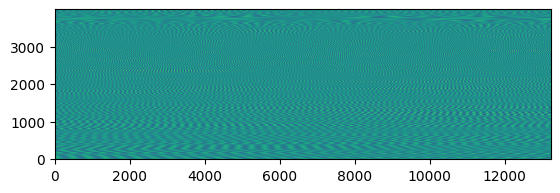

In [2]:
from map_signal import sinusoid_array
n_sinus = 4000
f_min = 100
f_max = 2000
sinus, freqs, times = sinusoid_array(n_sinus, f_min, f_max, duration=0.3)
plt.imshow(sinus, cmap='viridis' , origin='lower')

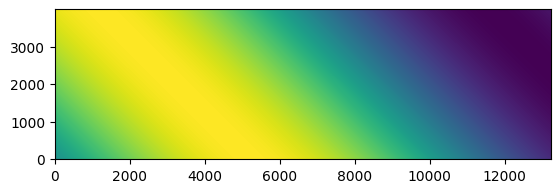

In [3]:
# Envelope new method
phase = np.pi / 4
freq = 3/44100

x = np.arange(0, len(times[0])).reshape((1,len(times[0])))
y = np.arange(0, len(freqs)).reshape((len(freqs),1))

x_val = x * np.cos(phase)
y_val = y * np.sin(phase)

xy = x_val + y_val
env = np.sin(2 * np.pi * freq * xy)
env.shape
plt.imshow(env, cmap='viridis' , origin='lower')

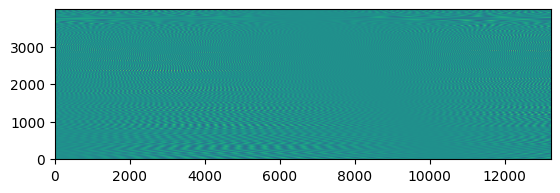

In [4]:
ripple = (2 * env) * sinus
ripple = ripple / ripple.max()

plt.imshow(ripple, cmap='viridis' , origin='lower')

In [5]:
from map_signal import to_int
sound = to_int(ripple.sum(axis=0))
Audio(sound, rate=44100)

In [6]:
# Envelope old method
n_sinus = 4000
f_min = 100
f_max = 2000
sinus, freqs, times = sinusoid_array(n_sinus, f_min, f_max, duration=0.3)

density = 0.05
velocity = 2
depth = 3
phase = 0

spectral_indices = np.log2(freqs / f_min) * density
spectral_phases = times * velocity

# Compute the envelope of the ripples
envelope = 1 + depth * np.sin(2 * np.pi * (spectral_indices + spectral_phases) + phase)

# Compute ripples and scales the long-term average spectrum energy
ripples = envelope * sinus


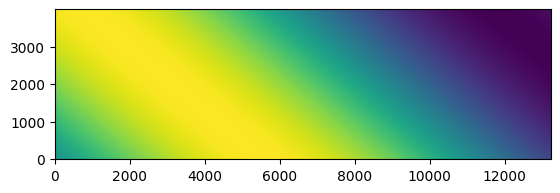

In [7]:
#Old method
plt.imshow(envelope, cmap='viridis' , origin='lower')

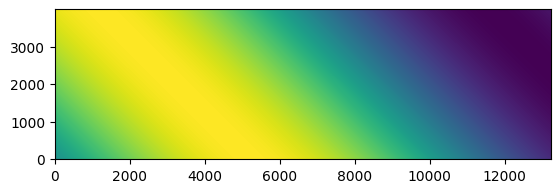

In [8]:
# Compared to new
plt.imshow(env, cmap='viridis' , origin='lower')

In [10]:
# Listen to new
sound = to_int(ripples.sum(axis=0))
Audio(sound, rate=44100)

In [9]:
# Listen to old
sound = to_int(ripples.sum(axis=0))
Audio(sound, rate=44100)

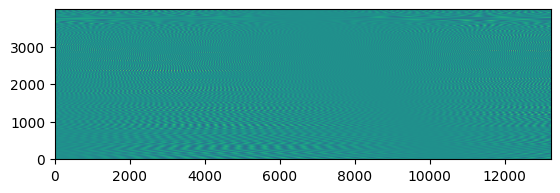

In [11]:
# Look at new
plt.imshow(ripple, cmap='viridis' , origin='lower')

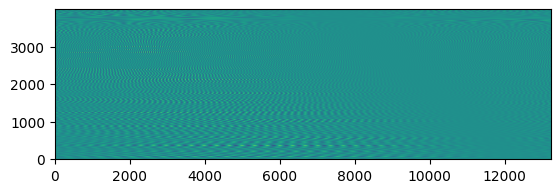

In [12]:
# Look at old
plt.imshow(ripples, cmap='viridis' , origin='lower')